In [1]:
%matplotlib inline

from __future__ import division
import csv
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from scipy import signal
from scipy import optimize
import pylab
import csv
from basic_definitions import *
from math import floor
import time      
from IPython.core.debugger import Tracer
import matlab.engine
from tqdm import tqdm
import scipy
from collections import Counter, defaultdict
from itertools import count




In [2]:
def digitize_wind(x,J_max,uniform=False):
    if uniform:
        x_sorted = np.array(sorted(x))
        bin_edge = np.linspace(0,len(x),num=J_max, endpoint=False, dtype=int)
        bins = x_sorted[bin_edge]
    else:
        bins = np.linspace(min(x),max(x),J_max)
    
    bins_states = np.append(bins,max(x))
    bin_means = []
    for i in range(J_max):
        bin_means.append((bins_states[i]+bins_states[i+1])/2)

    return np.digitize(x,bins)-1, np.array(bin_means)

WindSpeed is not a float


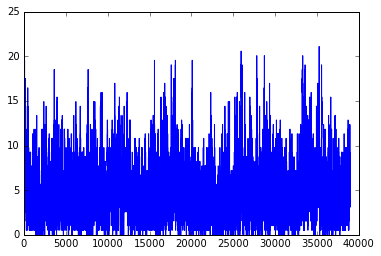

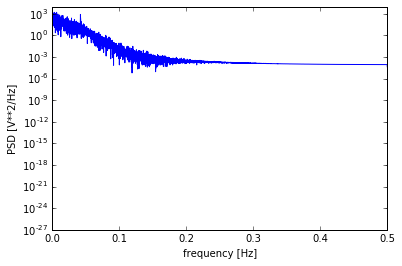

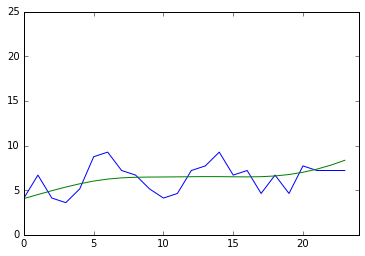

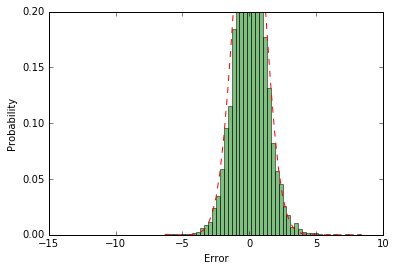

Mean:  0.000139676389468   Std:  1.15544841431
0
[-6.38650702 -5.99525445 -5.60400189 -5.21274933 -4.82149676 -4.4302442
 -4.03899164 -3.64773907 -3.25648651 -2.86523395 -2.47398138 -2.08272882
 -1.69147625 -1.30022369 -0.90897113 -0.51771856 -0.126466    0.26478656
  0.65603913  1.04729169  1.43854425  1.82979682  2.22104938  2.61230194
  3.00355451  3.39480707  3.78605964  4.1773122   4.56856476  4.95981733
  5.35106989  5.74232245  6.13357502  6.52482758  6.91608014  7.30733271
  7.69858527  8.08983784  8.4810904   8.87234296  9.06796924]


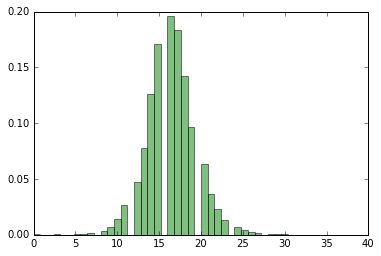

[-6.38650702 -5.99525445 -5.60400189 -5.21274933 -4.82149676 -4.4302442
 -4.03899164 -3.64773907 -3.25648651 -2.86523395 -2.47398138 -2.08272882
 -1.69147625 -1.30022369 -0.90897113 -0.51771856 -0.126466    0.26478656
  0.65603913  1.04729169  1.43854425  1.82979682  2.22104938  2.61230194
  3.00355451  3.39480707  3.78605964  4.1773122   4.56856476  4.95981733
  5.35106989  5.74232245  6.13357502  6.52482758  6.91608014  7.30733271
  7.69858527  8.08983784  8.4810904   8.87234296  9.06796924]


In [3]:
Speed = get_wind_data('Filton_wind_record.csv',col=5) # Filton_wind_record col=9   WindData col = 4 
spd_all = []
for i in Speed:
    try:
        spd_all.append(float(i)*0.514444)
        
    except ValueError:
        print i + " is not a float"

# filter out negative wind speeds
spd_all[:] = (value for value in spd_all if value >= 0)
#print len(spd_all)        
        
plt.plot(spd_all)
plt.show()
# how many years are analysed        
years = 1
spd = spd_all[0:365*24*years]        

# settings
J_max = 41



        
# SAVGOL 
# S = scipy.signal.savgol_filter(spd,35,2) 
# Forecast = scipy.signal.savgol_filter(spd_all,35,2) 

# Low Pass
b, a = scipy.signal.butter(2, 0.1, 'low') #4, 100, 'low'
S = scipy.signal.filtfilt(b, a, spd)
Forecast = scipy.signal.filtfilt(b, a, spd_all)

f, Pxx_den = signal.periodogram(S)
plt.semilogy(f, Pxx_den)
#plt.axis([0,1,0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


plt.plot(spd_all[0:24],label='Wind')
plt.plot(S[0:24],label='Forecast')
plt.axis([0,24,0,25])
plt.show()


# Median filter
#S = scipy.signal.medfilt(spd,5)
err = spd-S # error of forecast compared to realisation
err_all = spd_all - Forecast

# Stat analysis of err
#n, bins, patches = plt.hist(Err, bins=20,normed=1, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(err, bins=50,normed=1, facecolor='green', alpha=0.5)

y = plt.mlab.normpdf(bins, err.mean(), err.std())
plt.plot(bins, y, 'r--')
plt.xlabel('Error')
plt.ylabel('Probability')
plt.axis([-15,10,0,0.2])
plt.show()
print  "Mean: ", err.mean(),"  Std: ", err.std()

# def discretise_wind(x,J_max=21,factor=None):
#     #print Hmax,Hmin
#     x_sorted = np.sort(x)
#     bins = lins
#     np.digitize(x)
    
#     if factor is None and J_max is not None:
#         factor = float(J_max/ (max(x)-min(x)))
#     elif factor is None and len(x)== 1:
#         raise ValueError('x must be series if no factor is provided, also provide J_max')
        
#     # discretise the levels of storage
#     G = [np.round(i*factor)/factor for i in x]
#     if len(set(G)) > J_max:
#         G = [np.floor(i*factor)/factor for i in x]
        
#     # if still too large:
#     if len(set(G)) > J_max:
#         mG = max(set(G))
#         G = [i for i in G if i < mG]
        
#     return np.array(G),factor


states, state_errors = digitize_wind(err_all,J_max)
#states, state_errors = digitize_wind(err,J_max)

print min(states)
print state_errors

n, bins, patches = plt.hist(states, bins=50,normed=1, facecolor='green', alpha=0.5)
plt.show()



Err = np.array([state_errors[i] for i in states])

print state_errors
#set_of_Err_total = range(J_max)#sorted(set(Err))

# Transition matrix
#Err = [i for i in Err if i >= 10]


# ax.set_yticklabels([state_to_Err[0],state_to_Err[5],state_to_Err[10],state_to_Err[15],state_to_Err[20]])
# ax.set_xticklabels([state_to_Err[0],state_to_Err[5],state_to_Err[10],state_to_Err[15],state_to_Err[20]])
# #savefig('T_matrix_data.png')
# plt.show()

#print Err_to_state # dict of Err : state 



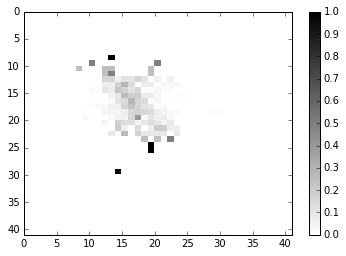

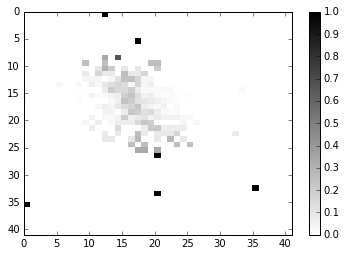

In [4]:
def tmatrix(lst,J_max):
    """from http://stackoverflow.com/questions/28013878/calculate-transition-matrix-of-letters?lq=1
    defaultdict that'll produce a unique index for each unique character
    encountered in lst
    """

    # add thing to normalise
    a_state_chain = []# will contain each change of state twice
    for i in range(J_max):
        chain =  np.zeros(2*J_max)+int(i)
        chain = chain.tolist()
        for j in range(J_max):
            chain[j*2+1] = j

        a_state_chain.extend(chain)

    a_state_chain.append(0)

    lst = lst.tolist()
    lst.extend(a_state_chain) #don't use last J_max * J_max + 1 states
    lst = np.array(lst)
    
    
    
    indices = defaultdict(count().next)
    b = np.zeros([J_max,J_max])
    
    Ct = Counter(zip(lst, lst[1:])) # zip together consecutive elements of the list

    for (x, y), c in iter(sorted(Ct.iteritems())): # make sorted iteration to generate sorted trasition matrix
        #print (x,y), c
        b[indices[x]][indices[y]] = float(c)
       
    res = dict((v,k) for k,v in indices.iteritems())
    
    b = np.array(b)
    b = b-2 # remove the bit added for normalisations

    ##Normalise 
    for i in range(J_max):
        if float(b.sum(axis=1)[i]) > 0:
            b[i] = b[i]/float(b.sum(axis=1)[i])
        else:
            #  only zeros
            b[i] = b[i]
    
    # throw error if nan value
    if np.isnan(np.sum(b)):
        print b
        raise ValueError("NaN in T_mat")
       
    
    # sort!
    #output = np.zeros([J_max,J_max])
    #print len(res)
    
#     for i in range(20):
#         output[i] = b[res[i]]
        
    return b#, indices    
    #return output, indices

#T_mat, Err_to_state =  tmatrix(Err,J_max)

T_mat =  tmatrix(states[500:1000],J_max)
#print Err_to_state


#print set(Err)
c = plt.pcolor(T_mat)
plt.set_cmap('gray_r')
plt.colorbar()
plt.axis([0,len(T_mat),0,len(T_mat)])
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])
#state_to_Err = dict((value, key) for key, value in Err_to_state.iteritems())

#xx, locs = plt.xticks()
#ll = ['%.3f' % a for a in xx]
#plt.xticks([state_to_Err[0],state_to_Err[10],state_to_Err[20]],[0, 11, 21])
plt.show()

T_mat =  tmatrix(states[0:500],J_max)
#print Err_to_state


#print set(Err)
c = plt.pcolor(T_mat)
plt.set_cmap('gray_r')
plt.colorbar()
plt.axis([0,len(T_mat),0,len(T_mat)])
ax=plt.gca()                            # get the axis
ax.set_ylim(ax.get_ylim()[::-1])
#state_to_Err = dict((value, key) for key, value in Err_to_state.iteritems())

#xx, locs = plt.xticks()
#ll = ['%.3f' % a for a in xx]
#plt.xticks([state_to_Err[0],state_to_Err[10],state_to_Err[20]],[0, 11, 21])
plt.show()

In [5]:
def make_T_mat(wind,J_max=21,filter_order=2,filter_level=0.01,offset=0):
    """
    Makes all the wind stats needed. Does not include the time from 
    end to offset in probability matrix generation.
    """
    b, a = scipy.signal.butter(filter_order,filter_level,'low') #4, 100, 'low'
    Forecast = scipy.signal.filtfilt(b,a,wind)
    #Err,factor = discretise_wind(wind-Forecast,J_max=J_max)
    #print "Forecast ", np.shape(Forecast)

    states, state_errors =digitize_wind(wind[:-1-offset]-Forecast[:-1-offset],J_max)
    #print "len(set(states)) ", len(set(states))
    
    Err = np.array([state_errors[i] for i in states])
    #T_mat, Err_to_state =  tmatrix(Err,J_max)
    T_mat =  tmatrix(states,J_max)
    
    Err_to_state = dict(zip(state_errors,range(J_max)))
    
    return T_mat, Err_to_state, state_errors, Err, Forecast

# T_mat, Err_to_state, state_errors, Err, Forecast = make_T_mat(spd_all,J_max=51, offset=0)
# #print T_mat
# c = plt.pcolor(T_mat)
# plt.set_cmap('gray_r')
# plt.colorbar()
# plt.axis([0,len(T_mat),0,len(T_mat)])
# ax=plt.gca()                            # get the axis
# ax.set_ylim(ax.get_ylim()[::-1])
# #print "Err_to_state, state_errors"
# #print Err_to_state, state_errors
# state_to_Err = dict((value, key) for key, value in Err_to_state.iteritems())
# plt.show()


In [6]:
def simple_scheduler(cost,min_pump_ops=0):
    """Takes a cost schedule and pumps at the minimum cost,
    pumps as many times as specified by the min_pump_ops"""
    
    cost_sort = sorted(cost.tolist())[0:min_pump_ops]
    print cost_sort
    sched =[]
    for i in cost:
        if i in cost_sort:
            sched.append(1)
            cost_sort.remove(i)
        else:
            sched.append(0)
            
    return np.array(sched)

In [7]:
state_errors

array([-6.38650702, -5.99525445, -5.60400189, -5.21274933, -4.82149676,
       -4.4302442 , -4.03899164, -3.64773907, -3.25648651, -2.86523395,
       -2.47398138, -2.08272882, -1.69147625, -1.30022369, -0.90897113,
       -0.51771856, -0.126466  ,  0.26478656,  0.65603913,  1.04729169,
        1.43854425,  1.82979682,  2.22104938,  2.61230194,  3.00355451,
        3.39480707,  3.78605964,  4.1773122 ,  4.56856476,  4.95981733,
        5.35106989,  5.74232245,  6.13357502,  6.52482758,  6.91608014,
        7.30733271,  7.69858527,  8.08983784,  8.4810904 ,  8.87234296,
        9.06796924])

In [8]:
print Cost_true[0:24]*Schedule_det[1]
print Forecast

NameError: name 'Cost_true' is not defined

  0%|                                                 | 0/1000 [00:00<?, ?it/s]

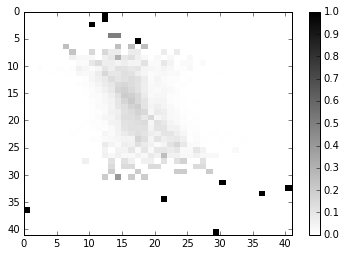

 20%|██████▊                           | 200/1000 [3:56:51<14:59:03, 67.43s/it]

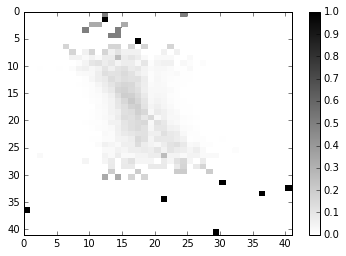

 40%|█████████████▌                    | 400/1000 [7:54:01<12:06:54, 72.69s/it]

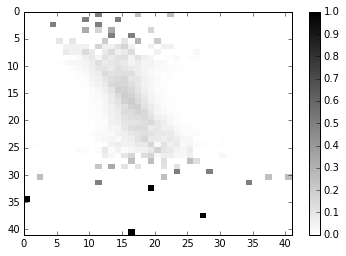

100%|███████████████████████████████████| 1000/1000 [19:43:03<00:00, 70.66s/it]


In [9]:
## Network Settings
tank = Tank(Elev=20,Hmin=0,Hmax=2,Dia=10,levels = 100)
Pipe = pipe(L = 1000,D = 0.5,Method = "DW")
pump = Hyd_pump("ETAline-100-100-210-FSD.crv")
Demand = [0.0379, 0.0398, 0.0426, 0.0473, 0.0379, 0.0369, 0.0426, 0.0530, 0.0568, 0.0757, 0.1325, 0.1609, 0.1704, 0.1515, 0.1136, 0.0947, 0.0757, 0.0710, 0.0682, 0.0663, 0.0710, 0.0663, 0.0757,  0.0776, 0.0757, 0.0748, 0.0899, 0.1041, 0.1231, 0.1136, 0.1041, 0.1325, 0.1515, 0.1562, 0.1704, 0.2083, 0.1609, 0.1704, 0.1231, 0.1136, 0.0757, 0.0663, 0.0473, 0.0426, 0.0379, 0.0379, 0.0379, 0.0360]
change_in_H = np.array(Demand)*60*60/4/tank.Area/10/0.89993

#stepsize = 0.2

T = 24
d_fact = 0.7


pump_perf = gen_flow_rate(tank.levels,tank,Pipe,pump,100)
Demand_DP = np.array(change_in_H)/2
Demand_DP = list_length_adjustment(Demand_DP,T)

tot_det = []
tot_dp = []
tot_dp_rej = []
tot_det_rej = []
tot_det_planned_rej = []
tot_det_planned = []
tot_det_1 = []
tot_dp_1 = []
tot_det_planned_1 = []
tot_perf = []
tot_dp_cor = []




def compute_stoch_cost2(T,Cost_true,state_true,schedule_DP,P_matrix,J_max,change_in_H,d_fact,H_rec,tank,pump_perf):   
    """
    Computes the operating cost given the actual wind realisations,
    a schedule to follow, the pump conditions and the probability
    matrix.
    
    Computes the stochastic operating cost given
    a certain schedule and the way the wind behaves.
    """
    #DP stuff
    Tot_cost_DP = schedule_DP[1+state_true[0],0]*Cost[state_true[0],0]
    Tot_cost_DP += schedule_DP[1+state_true[1],1]*Cost[state_true[1],1]
    sched_stoch_used = [schedule_DP[1+state_true[0],0], schedule_DP[1+state_true[1],1]]
    for i in range(2,T):        
        Cost_sim = Cost[:,i:i+24]
        Demand=np.roll(change_in_H*d_fact,-i)
        #print Demand
        Calc_Cost, schedule_DP, H_init, h_final, final_val,  H_rec = \
            call_val(H_rec[state_true[i]][1], t_init=0, j_init=state_true[i], T=T,Demand=Demand,\
            Energy=Cost_sim, J_max=J_max,P_matrix = P_matrix,tank=tank, pump_perf=pump_perf)
        #print schedule_DP[1,1+J_seq[i]]
        Tot_cost_DP += schedule_DP[1+state_true[i],1]*Cost_true[i]
        
        if ~np.isnan(schedule_DP[1+state_true[i],1]):
            sched_stoch_used.append(int(schedule_DP[1+state_true[i],1]))
        else:
            sched_stoch_used.append(0)
        
    # normalise schedule cost:
    sched_stoch_used = np.array(sched_stoch_used)
    #print sum(sched_stoch_used)    

        
    
    return Tot_cost_DP, sched_stoch_used


T_mat_hist= []
Forecast = scipy.signal.filtfilt(b, a, spd_all)
for day in tqdm(range(1000)):
    #print day
    init = 365*24*years+24*day # set what day do analyse
    wind_true = np.array(spd_all[init:init+48])
    #print "len(spd_all[0:init+48])", len(spd_all[0:init+48])
    T_mat, Err_to_state, state_errors, Err, Forecast = make_T_mat(states[0:init+48],J_max=J_max,offset=48)
    #T_mat, Err_to_state, state_errors, Err, Forecast = make_T_mat(spd_all[0:init+48],J_max=J_max,offset=48)
    
    T_mat_hist.append(T_mat)
    
    if day in [0,200,400]:
        c = plt.pcolor(T_mat)
        plt.set_cmap('gray_r')
        plt.colorbar()
        plt.axis([0,len(T_mat),0,len(T_mat)])
        ax=plt.gca()                            # get the axis
        ax.set_ylim(ax.get_ylim()[::-1])
        plt.show()
    
    
    A = np.array(Forecast[-49:-1])
    #print "A", len(A)
    #print np.shape(T_mat)
    
    Err_day = Err[-48:]
    #print np.shape(Energy)
    #Err_day = discretise_wind(wind_true-A,factor=factor )  
    #Err_day = Err[init:init+48]
    #print Err_day
    state_true =[]
    #print len(Err_day[0])
    for i in Err_day:
        #print i
        #print Err_to_state
        #print Err_to_state(i)
        
        state_true.append(Err_to_state[i])
        
    #print "state_true len", len(state_true)
    
    
    
    Tariff = [5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 9.6980, 9.6980, 9.6980, 9.6980, 5.7180, 5.7180, 5.7180, 5.7180]
    Tariff = list_length_adjustment(Tariff,T)
    Tariff.extend(Tariff)

    #print "len(set_of_Err_total) ", len(set_of_Err_total)
    D = np.array(A,ndmin=2)+np.array(state_errors,ndmin=2).T # set of possible wind ranges
    #D = provide_speed_range(A,stepsize=stepsize,number_of_steps=J_max)
    #D = provide_speed_range(A,number_of_steps=J_max,f=[0.2,0.3])
    #print "D ",np.shape(D)

    Pwr = np.zeros_like(D)
    Cost = np.zeros_like(D)
    Cost_true= np.zeros_like(wind_true)
    #print wind_true
    for i in range(0,np.shape(D)[0]):
        Cost_true[i] = max((2500-Turb_power(wind_true[i],Cutoff=25))*Tariff[i],0) 
        for j in range(0,np.shape(D)[1]):
            Pwr[i,j] = Turb_power(D[i,j],Cutoff=25)
            Cost[i,j] = max( (2500-Pwr[i,j])*Tariff[i],0)

    #print Cost_true
    #print np.shape(Cost)
    Cost_for_DP = Cost
    #print np.shape(Cost)
    
    Cost_for_det = Cost[int(np.floor(J_max/2.0)),:].tolist()
    
    
    #print "Av. det cost ", np.array(Cost_for_det).mean(),  
    #print "Av. true cost ", Cost_true.mean(),
    #print "Av. stoch cost ", Cost.mean(),
    
    #print np.shape(Cost_for_det), np.shape(Cost_for_DP), np.shape(Cost_true), 
    
    # Deterministic    
    Calc_Cost_det, Schedule_det, H_init_det, h_final_det, final_val_det = \
    call_val_det(H_init=1.0, t_init=0, j_init=state_true[0], T=24,Demand=change_in_H*d_fact,\
                                                           Energy=Cost_for_det, tank=tank, pump_perf=pump_perf)
    
    Tot_cost_det =np.dot(Cost_true[0:24],np.array(Schedule_det[1]))
    #
    #print "Schedule det ", Schedule_det[1]
    
    
    # Perfect
    Calc_Cost_perf, Schedule_perf, H_init_perf, h_final_perf, final_val_perf = \
    call_val_det(H_init=1.0, t_init=0, j_init=state_true[0], T=24,Demand=change_in_H*d_fact,\
                                                           Energy=Cost_true, tank=tank, pump_perf=pump_perf)
    
    #print "Schedule_perf ",Schedule_perf[1]
    
    # Stoc
    #print "np.shape(Cost_for_DP[0:24])", np.shape(Cost_for_DP[0:24])
    Calc_Cost, Schedule, H_init, h_final, final_val, H_rec = call_val(H_init=1.0, t_init=0, j_init= state_true[0], T=T,Demand=change_in_H*d_fact,\
                                                               Energy=Cost_for_DP[:,0:24], J_max=J_max,P_matrix = T_mat,\
                                                               tank=tank, pump_perf=pump_perf)

    Tot_cost_DP, schedule_stoc_used = compute_stoch_cost2(T,Cost_true,state_true, Schedule,\
                                                           T_mat,J_max,\
                                                          change_in_H,d_fact,H_rec,tank, pump_perf)
    
    Tot_cost_DP_actual = sum(Cost_true[0:24]*schedule_stoc_used)
    Tot_cost_DP_cor = Tot_cost_DP_actual*7/sum(schedule_stoc_used)
    #print "schedule_stoc_used ", schedule_stoc_used
    #simple schedulers
#     sched_simple_perf = simple_scheduler(Cost_true[0:24],min_pump_ops=7)
#     sched_simple_det = simple_scheduler(np.array(Cost_for_det[0:24]),min_pump_ops=7)
#     cost_simple_perf = sum(Cost_true[0:24]*sched_simple_perf)
#     cost_simple_det  = sum(Cost_true[0:24]*sched_simple_det)
#     print cost_simple_perf, cost_simple_det
    
    #print "Stoch sched: ", Schedule
    
    tot_det.append(Tot_cost_det)
    tot_det_planned.append(final_val_det)
    tot_dp.append(Tot_cost_DP_actual)
    tot_dp_cor.append(Tot_cost_DP_cor)
    tot_perf.append(Calc_Cost_perf[0])
    
    
    #print Schedule_det,Schedule_perf

In [10]:
import pandas as pd
df = pd.DataFrame([range(len(tot_perf)), tot_det,    tot_det_planned,     tot_dp,      tot_dp_cor,            tot_perf]).T
df.columns = ['Day' , 'Deterministic', 'Expected', 'Stochastic', 'Stochastic corrected', 'Perfect']
df['Difference'] = df['Deterministic']-df['Stochastic']
df['Difference cor'] = df['Deterministic']-df['Stochastic corrected']
df.to_csv('changing_T_results_larege_1000_with_J41_cor.csv') # SAVING FILE!!
#df.rename(columns={0:'Deterministic', 1:'Expected', 2:'Stochastic', 3:'Stochastic corrected', 4:'Perfect'},inplace=True)
df

Day  Deterministic  Expected     Stochastic  Stochastic corrected  \
0      0.0  135830.443621      0.04  165638.015251         128829.567417   
1      1.0  169264.310456      0.04  193175.990737         150247.992796   
2      2.0  178661.649828      0.04  186633.744742         163304.526649   
3      3.0  179845.108524      0.04  214388.631296         166746.713230   
4      4.0  180332.702656      0.04  191430.000000         167501.250000   
5      5.0  178735.153510      0.04  211339.723240         164375.340298   
6      6.0  164338.483918      0.04  188454.275598         146575.547688   
7      7.0  167001.969315      0.04  158318.529122         138528.712982   
8      8.0  175980.924466      0.04  144801.927826         144801.927826   
9      9.0  181477.500000      0.04  215675.000000         167747.222222   
10    10.0  158707.795008      0.04  197594.324255         153684.474420   
11    11.0  155197.134592      0.04  175188.351040         136257.606365   
12    12.0  179845.108524      0.04  210145.323391         163446.362637   
13    13.0  145548.909733      0.04  197760.055478         153813.376483   
14    14.0  160850.081715      0.04  170178.498833         148906.186479   
15    15.0   50980.186862      0.04   39051.851920          30373.662604   
16    16.0  123066.594912      0.04  140502.198164         122939.423393   
17    17.0   89621.453629      0.04  126063.855768         110305.873797   
18    18.0   80025.401050      0.04   82890.219251          82890.219251   
19    19.0   51627.026101      0.04   48382.246148          42334.465380   
20    20.0  169249.528221      0.04  109702.447794         109702.447794   
21    21.0  170905.634089      0.04  168375.687375         147328.726454   
22    22.0  132410.546424      0.04  164435.531991         143881.090492   
23    23.0   55517.549136      0.04   85931.009782          75189.633559   
24    24.0  112751.167073      0.04  129052.732434          90336.912703   
25    25.0  141815.550656      0.04  140316.381257         109134.963200   
26    26.0  177621.081233      0.04  213129.913305         186488.674142   
27    27.0  181477.500000      0.04  171968.017159         150472.015014   
28    28.0  181477.500000      0.04  191235.517159         167331.077514   
29    29.0  170050.270683      0.04  167911.991146         146922.992253   
..     ...            ...       ...            ...                   ...   
970  970.0  179703.622438      0.04  225137.405869         175106.871231   
971  971.0  179495.266730      0.04  168450.000000         168450.000000   
972  972.0  178622.988475      0.04  211562.639824         164548.719863   
973  973.0  173849.732243      0.04  207399.890941         161311.026287   
974  974.0  159131.908256      0.04  208872.284715         162456.221445   
975  975.0  175128.505886      0.04  188713.693827         165124.482098   
976  976.0  178869.920262      0.04  186482.460111         163172.152597   
977  977.0  181477.500000      0.04  172307.405869         150768.980135   
978  978.0  179806.447172      0.04  215187.405869         167367.982342   
979  979.0  143560.199611      0.04  114233.103274         114233.103274   
980  980.0  179114.503867      0.04  213872.828896         166345.533586   
981  981.0  150592.510723      0.04  179134.878870         139327.128010   
982  982.0  181477.500000      0.04  191430.000000         167501.250000   
983  983.0  181477.500000      0.04  215675.000000         167747.222222   
984  984.0  180502.311737      0.04  215187.405869         167367.982342   
985  985.0  178071.316236      0.04  168663.051508         147580.170069   
986  986.0  176608.619115      0.04  188967.496677         165346.559593   
987  987.0  169375.555732      0.04  171197.450854         149797.769497   
988  988.0  172880.309202      0.04  214360.423027         166724.773466   
989  989.0  176261.202967      0.04  188125.034349         164609.405055   
990  990.0  175571.887189      0.04  211374.963774     

In [63]:
# Times J_max = 5
# 1:05:30 for 1000 = 3930s 0.16s per rep 
# for J = 41 -> 37s per rep

#     op_cost = sum(cost_sort[0:min_pump_ops])
    
#    return cost_sort#op_cost

cost = np.array([0,3,6,0,0.8,8,2,1,7,1])
simple_scheduler(cost,5)

[0.0, 0.0, 0.8, 1.0, 1.0]


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [20]:
Tariff = np.array([5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180, 5.7180,
                   5.7180, 5.7180, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 
                   17.1520, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 9.6980,
                   9.6980, 9.6980, 9.6980, 9.6980, 9.6980, 17.1520, 17.1520, 17.1520, 17.1520, 17.1520, 
                   17.1520, 17.1520, 9.6980, 9.6980, 9.6980, 9.6980, 5.7180, 5.7180, 5.7180, 5.7180])

min_tarrif = simple_scheduler(Tariff,14)
print np.sum(min_tarrif*Tariff )*2500

[5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718, 5.718]
200130.0


In [69]:
print schedule_DP[1+state_true[i],1]

NameError: name 'schedule_DP' is not defined

In [70]:
print np.array(Schedule_det[1])
print np.array(Schedule_perf[1])
print sum(Cost_true[0:24]*np.array(Schedule_perf[1]))
print np.dot(Cost_true[0:24],np.array(Schedule_det[1]))

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1]
[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1]
0.0
0.0


In [78]:
np.isnan(float(NaN))

NameError: name 'NaN' is not defined

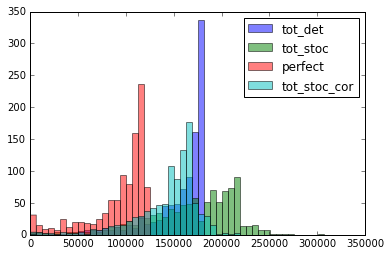

In [11]:
bins = np.linspace(0, max( max(tot_det), max(tot_dp), max(tot_det_planned)  ), 50)
#bins = np.linspace(0,500, 50)
plt.hist(tot_det, bins, alpha=0.5, label='tot_det')
plt.hist(tot_dp, bins, alpha=0.5, label='tot_stoc')
plt.hist(tot_perf, bins, alpha=0.5, label='perfect')
plt.hist(tot_dp_cor, bins, alpha=0.5, label='tot_stoc_cor')
plt.legend(loc='best')
plt.show()

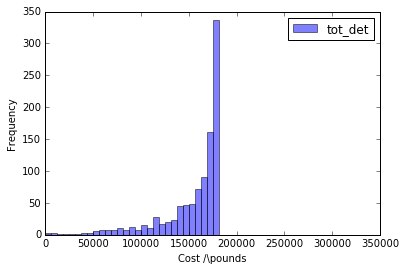

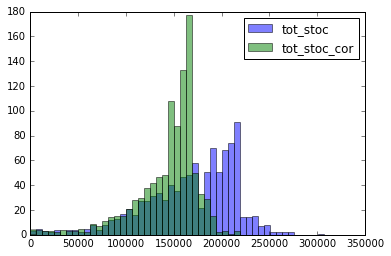

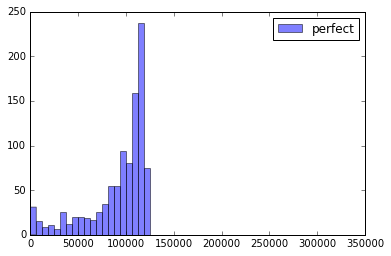

In [27]:
hfont = {'fontname':'Helvetica'}
plt.hist(tot_det, bins, alpha=0.5, label='tot_det')
plt.legend(loc='best')#, **hfont) 
plt.xlabel('Cost /\pounds')
plt.ylabel('Frequency')
plt.show()


plt.hist(tot_dp, bins, alpha=0.5, label='tot_stoc')
plt.hist(tot_dp_cor, bins, alpha=0.5, label='tot_stoc_cor')
plt.legend(loc='best')
plt.show()


plt.hist(tot_perf, bins, alpha=0.5, label='perfect')
plt.legend(loc='best')
plt.show()

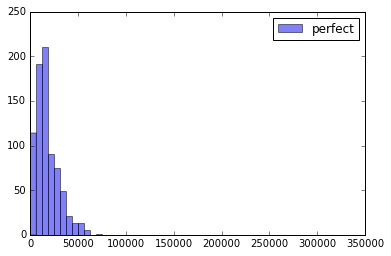

Day  Deterministic  Expected     Stochastic  Stochastic corrected  \
0      0.0  135830.443621      0.04  165638.015251         128829.567417   
1      1.0  169264.310456      0.04  193175.990737         150247.992796   
2      2.0  178661.649828      0.04  186633.744742         163304.526649   
3      3.0  179845.108524      0.04  214388.631296         166746.713230   
4      4.0  180332.702656      0.04  191430.000000         167501.250000   
5      5.0  178735.153510      0.04  211339.723240         164375.340298   
6      6.0  164338.483918      0.04  188454.275598         146575.547688   
7      7.0  167001.969315      0.04  158318.529122         138528.712982   
8      8.0  175980.924466      0.04  144801.927826         144801.927826   
9      9.0  181477.500000      0.04  215675.000000         167747.222222   
10    10.0  158707.795008      0.04  197594.324255         153684.474420   
11    11.0  155197.134592      0.04  175188.351040         136257.606365   
12    12.0  179845.108524      0.04  210145.323391         163446.362637   
13    13.0  145548.909733      0.04  197760.055478         153813.376483   
14    14.0  160850.081715      0.04  170178.498833         148906.186479   
15    15.0   50980.186862      0.04   39051.851920          30373.662604   
16    16.0  123066.594912      0.04  140502.198164         122939.423393   
17    17.0   89621.453629      0.04  126063.855768         110305.873797   
18    18.0   80025.401050      0.04   82890.219251          82890.219251   
19    19.0   51627.026101      0.04   48382.246148          42334.465380   
20    20.0  169249.528221      0.04  109702.447794         109702.447794   
21    21.0  170905.634089      0.04  168375.687375         147328.726454   
22    22.0  132410.546424      0.04  164435.531991         143881.090492   
23    23.0   55517.549136      0.04   85931.009782          75189.633559   
24    24.0  112751.167073      0.04  129052.732434          90336.912703   
25    25.0  141815.550656      0.04  140316.381257         109134.963200   
26    26.0  177621.081233      0.04  213129.913305         186488.674142   
27    27.0  181477.500000      0.04  171968.017159         150472.015014   
28    28.0  181477.500000      0.04  191235.517159         167331.077514   
29    29.0  170050.270683      0.04  167911.991146         146922.992253   
..     ...            ...       ...            ...                   ...   
970  970.0  179703.622438      0.04  225137.405869         175106.871231   
971  971.0  179495.266730      0.04  168450.000000         168450.000000   
972  972.0  178622.988475      0.04  211562.639824         164548.719863   
973  973.0  173849.732243      0.04  207399.890941         161311.026287   
974  974.0  159131.908256      0.04  208872.284715         162456.221445   
975  975.0  175128.505886      0.04  188713.693827         165124.482098   
976  976.0  178869.920262      0.04  186482.460111         163172.152597   
977  977.0  181477.500000      0.04  172307.405869         150768.980135   
978  978.0  179806.447172      0.04  215187.405869         167367.982342   
979  979.0  143560.199611      0.04  114233.103274         114233.103274   
980  980.0  179114.503867      0.04  213872.828896         166345.533586   
981  981.0  150592.510723      0.04  179134.878870         139327.128010   
982  982.0  181477.500000      0.04  191430.000000         167501.250000   
983  983.0  181477.500000      0.04  215675.000000         167747.222222   
984  984.0  180502.311737      0.04  215187.405869         167367.982342   
985  985.0  178071.316236      0.04  168663.051508         147580.170069   
986  986.0  176608.619115      0.04  188967.496677         165346.559593   
987  987.0  169375.555732      0.04  171197.450854         149797.769497   
988  988.0  172880.309202      0.04  214360.423027         166724.773466   
989  989.0  176261.202967      0.04  188125.034349         164609.405055   
990  990.0  175571.887189      0.04  211374.963774     

In [22]:
#  tot_perf## CAREFUL SAVES FILE!!!!!

plt.hist(df['Difference cor'], bins, alpha=0.5, label='perfect')
plt.legend(loc='best')
plt.show()
# FILE SAVE!!!!

#df.dropna()
#plt.hist(df[0], bins, alpha=0.5, label='tot_det')
#plt.hist(df[2], bins, alpha=0.5, label='tot_stoc')
#plt.hist(tot_perf[3], bins, alpha=0.5, label='perfect')
#plt.legend(loc='best')
#plt.show()

df

In [25]:
names = {0:'A'}

df

Deterministic   Expected    Stochastic  Stochastic corrected  Perfect
0   10705.809348  100065.04      0.000000              0.000000      0.0
1   12652.467225  100065.04  22927.881325          20061.896159      0.0
2   14295.000000  100065.04      0.000000              0.000000      0.0
3   13807.405869  100065.04  28102.405869          28102.405869      0.0
4   14295.000000  100065.04      0.000000              0.000000      0.0
5   14295.000000  100065.04  28590.000000          25016.250000      0.0
6   12652.467225  100065.04  26992.450854          31491.192663      0.0
7   13111.541303  100065.04      0.000000              0.000000      0.0
8   13111.541303  100065.04      0.000000              0.000000      0.0
9   14295.000000  100065.04  28590.000000          28590.000000      0.0

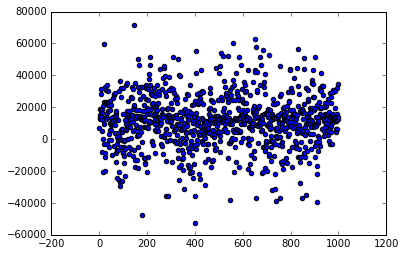

In [13]:
plt.scatter(df['Day'],df['Difference cor'])

In [26]:
df.Difference.mean()


20654.30053591631

In [21]:
df['Stochastic corrected'].max()

217525.0

In [ ]:
200130